## Implementing Logistc Regression with L2 regularization Using SGD In python From Scratch.

In [19]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N_xtrain = len(X_train)
N_xtest = len(X_test)

In [20]:
def sigmoid_func(x,w,b):
    z = (np.dot(x,w))+b
    return 1/(1+np.exp(-(z)))

######  Initial log_losss for train and test data.

In [21]:
import math

Y_train_pred = sigmoid_func(X_train,w,b)
Y_test_pred = sigmoid_func(X_test,w,b)

Train_loss,Test_loss = 0,0

for x in range(len(Y_train_pred)):
    Train_loss+=-((y_train[x]*(math.log(Y_train_pred[x])))+ ((1-y_train[x])*(math.log(1-Y_train_pred[x]))))
for y in range(len(Y_test_pred)):
    Test_loss+=-((y_test[y]*(math.log(Y_test_pred[y])))+ ((1-y_test[y])*(math.log(1-Y_test_pred[y]))))

print("Initial Train_loss is :",(Train_loss)/N,"\nInitial Test_loss is :",(Test_loss)/N)

Initial Train_loss is : 0.6931471805594285 
Initial Test_loss is : 0.23104906018668908


##### Finding opimal 'w' and 'b'

In [23]:
from tqdm import tqdm
import math

final_train_loss_list= []
final_test_loss_list = []
epochs = 100

for i in tqdm(range(epochs)):
    for j in range(len(X_train)):
        
        # Finding optimal 'w'
        w = ((1-((eta0*alpha)/N)) * w)+((alpha*X_train[j])*(y_train[j]-sigmoid_func(w,X_train[j],b)))
        
        # Finding optimal 'b'
        b = b+eta0*(y_train[j]-sigmoid_func(w,X_train[j],b))
        
    Y_train_pred = sigmoid_func(X_train,w,b)
    Y_test_pred = sigmoid_func(X_test,w,b)
    
    Train_loss,Test_loss = 0,0
    
    for x in range(len(Y_train_pred)):
        Train_loss+=-((y_train[x]*(math.log(Y_train_pred[x])))+ ((1-y_train[x])*(math.log(1-Y_train_pred[x]))))
    
    for y in range(len(Y_test_pred)):
        Test_loss+=-((y_test[y]*(math.log(Y_test_pred[y])))+ ((1-y_test[y])*(math.log(1-Y_test_pred[y]))))
    
    Train_loss = Train_loss/N_xtrain
    Test_loss = Test_loss/N_xtest
    
    final_train_loss_list.append(Train_loss)
    final_test_loss_list.append(Test_loss)



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:52<00:00,  1.12s/it]


In [24]:
print(w,"\nB is",b)

[-4.29756022e-01  1.93023835e-01 -1.48464492e-01  3.38103414e-01
 -2.21229065e-01  5.69932661e-01 -4.45183637e-01 -8.99209544e-02
  2.21804886e-01  1.73809503e-01  1.98727752e-01 -5.59489815e-04
 -8.13106734e-02  3.39094300e-01  2.29785009e-02] 
B is -0.8918931649054604


#### Ploting train_loss & Test_loss.

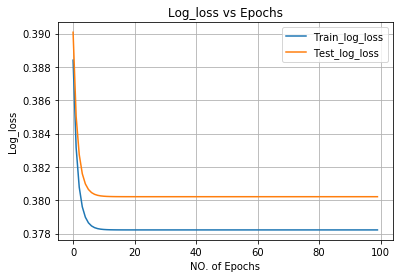

In [27]:
import matplotlib.pyplot as plt

plt.plot(final_train_loss_list, label='Train_log_loss')
plt.plot(final_test_loss_list, label='Test_log_loss')
plt.grid()
plt.xlabel("NO. of Epochs")
plt.ylabel("Log_loss")
plt.legend()
plt.title('Log_loss vs Epochs')
plt.show()

In [28]:
# Calculating train & test_loss with optimized 'w' and 'b'

Y_train_pred = sigmoid_func(X_train,w,b)
Y_test_pred = sigmoid_func(X_test,w,b)

Train_loss,Test_loss = 0,0

for x in range(len(Y_train_pred)):
    Train_loss+=-((y_train[x]*(math.log(Y_train_pred[x])))+ ((1-y_train[x])*(math.log(1-Y_train_pred[x]))))
for y in range(len(Y_test_pred)):
    Test_loss+=-((y_test[y]*(math.log(Y_test_pred[y])))+ ((1-y_test[y])*(math.log(1-Y_test_pred[y]))))

print("Final Train_loss is :",(Train_loss)/N,"\nFinal Test_loss is :",(Test_loss)/N)

Final Train_loss is : 0.3782234075242279 
Final Test_loss is : 0.1267385385592187


In [29]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid_func(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print("Train Accuracy with optimized w is :",1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print("Train Accuracy with optimized w is :",1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

Train Accuracy with optimized w is : 0.95224
Train Accuracy with optimized w is : 0.95


## Thanks For Coming..!! :) 